In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import_ecom = pd.read_excel(r"C:\Users\Lenovo C340\EcomData.xlsx")
ecom_df = pd.DataFrame(import_ecom)

In [4]:
ecom_df["Date"]= pd.DatetimeIndex(ecom_df["InvoiceDate"]).month

ecom_df["Spend"] = ecom_df["Quantity"]*ecom_df["UnitPrice"]


ecom_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,9,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,9,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,9,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,9,16.60


Country: mode values

Date: Mode values

Spend: Sum of spends by each customer

Grouping by customerID

In [5]:
ecom_df0 = ecom_df.groupby("CustomerID").agg({"Country": 'first' , 
                                            "Date": 'first' ,
                                            "Spend": sum })
ecom_df0 = ecom_df0[~(ecom_df0 == 0).any(axis=1)]
ecom_df0

,Country,Date,Spend
CustomerID,,,
12347.0,Iceland,7,4310.00
12348.0,Finland,12,1797.24
12349.0,Italy,11,1757.55
12350.0,Norway,2,334.40
12352.0,Norway,2,1545.41
...,...,...,...
18280.0,United Kingdom,7,180.60
18281.0,United Kingdom,12,80.82
18282.0,United Kingdom,5,176.60


In [6]:
ecom_df0.sort_values("Date")

,Country,Date,Spend
CustomerID,,,
14502.0,United Kingdom,1,2351.02
13064.0,United Kingdom,1,1119.49
13065.0,United Kingdom,1,205.86
17431.0,United Kingdom,1,403.30
13068.0,United Kingdom,1,344.00
...,...,...,...
17820.0,United Kingdom,12,-24.05
15062.0,United Kingdom,12,987.86
17214.0,United Kingdom,12,984.12


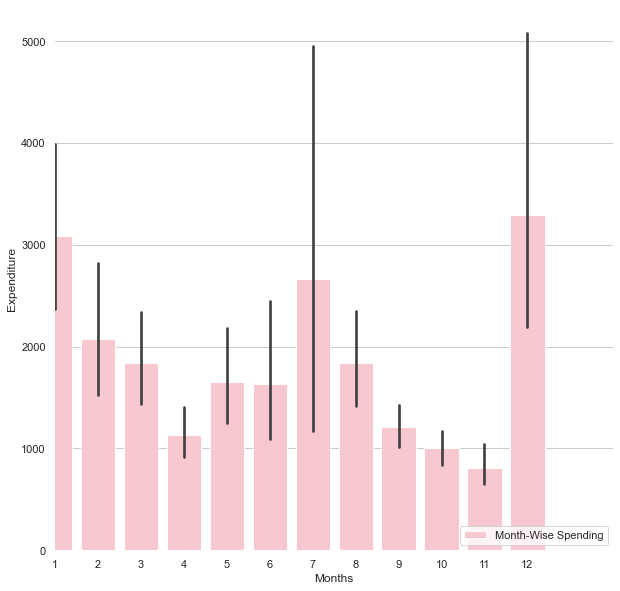

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Plot the total crashes
sns.set_color_codes("dark")
sns.barplot(x="Date", y="Spend", data=ecom_df0,
            label="Month-Wise Spending", color="pink")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 13), ylabel="Expenditure",
       xlabel="Months")
sns.despine(left=True, bottom=True)



In [8]:
tableau_ecom = ecom_df0.to_csv("tableau_ecom.csv")

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1623674345852' style='position: relative'><noscript><a href='#'><img alt='E-Commerce Sales Visualisation ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;E-&#47;E-commerceTransactionalData&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='E-commerceTransactionalData&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;E-&#47;E-commerceTransactionalData&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1623674345852');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);  

## Analysis of the Above Dashboard:

Countrywise breakdown of the Sales figures:  

in the bubble map we can see which countries (apart from UK) have the most sales. (We exclude UK as the website is UK-based and UK sales are disproportionately higher than the other countries).

Quarter-Wise Comparison of Average Sales:

We see the increase/decrease in quarter-wise sales of the website to see growth. The comparison has been broken down as YoY quarters due to seasonality of sales. As observed from the first graph of monthly expenditure, we can see that the data was clearly skewed in the festive months (December: Christmas, July: Sale Season).

Price of item vs Quantity Sold:

A clear demand curve is seen in this graph. However, the outliers should be noticed. These are the products that are behaving against the demand curve and hence can be studied further as Veblen or Giffen Goods.

In [154]:
ecom_df = ecom_df[ecom_df.Spend >= 0]
ecom_df3 = pd.pivot_table(ecom_df, index = "CustomerID", values= ["Spend", "Date"], aggfunc ={"Spend": 'mean',
                                                                                             "Date": 'last'})
                                                                                    #'last', 'first', 'var', 'mean', sum
ecom_df3

,Date,Spend
CustomerID,,
12346.0,1,77183.600000
12347.0,7,23.681319
12348.0,9,57.975484
12349.0,11,24.076027
12350.0,2,19.670588
...,...,...
18280.0,7,18.060000
18281.0,12,11.545714
18282.0,2,14.837500


<AxesSubplot:xlabel='CustomerID'>

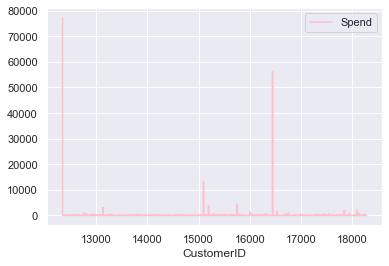

In [153]:
ecom_df3.plot(color= "pink")

In [126]:
ecom_dfxyz = ecom_df.loc[ecom_df.Spend >= 500]
ecom_dfxyz = ecom_dfxyz.loc[ecom_dfxyz.Date >= 8]
ecom_dfxyz

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Spend
18541,537823,DOT,1,2010-08-12 14:25:00,729.42,NaN,United Kingdom,8,729.42
19104,537833,51008,200,2010-08-12 14:53:00,2.95,13270.0,United Kingdom,8,590.00
19871,537899,22328,1488,2010-09-12 10:44:00,2.55,12755.0,Japan,9,3794.40
19980,537981,22492,1394,2010-09-12 11:35:00,0.55,17857.0,United Kingdom,9,766.70
20040,538005,22622,72,2010-09-12 12:12:00,8.50,13090.0,United Kingdom,9,612.00
...,...,...,...,...,...,...,...,...,...
540071,581459,22197,1200,2011-08-12 18:46:00,0.72,17949.0,United Kingdom,8,864.00
540421,581483,23843,80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,9,168469.60
540425,581485,20749,84,2011-09-12 09:38:00,6.35,17389.0,United Kingdom,9,533.40
540908,581492,DOT,1,2011-09-12 10:03:00,933.17,NaN,United Kingdom,9,933.17


In [127]:
ecom_dfxyz["Spend"].describe()

count       527.000000
mean       1532.701006
std        7533.007339
min         500.000000
25%         602.495000
50%         800.400000
75%        1314.000000
max      168469.600000
Name: Spend, dtype: float64

In [128]:
import seaborn as sns

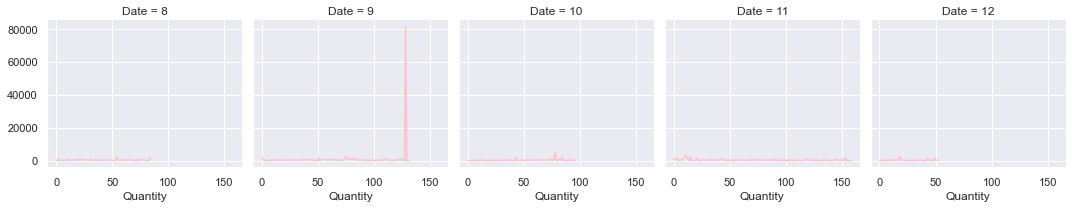

In [130]:
sns.set_style("darkgrid")
plot= sns.FacetGrid(data= ecom_dfxyz, col="Date")
plot.map(plt.plot, "Quantity", color="pink")